In [1]:
# Import libraries

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
import datetime
import pickle
import statsmodels.regression.linear_model
import statsmodels.api as sm


# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")

# Success - Display the first record
print("weather  data : ", weather.shape)

import awesome_functions as cf

# 원본을 유지하기 위해서 카피
df_weather = weather.copy()
df_key = key.copy()
df_train = train.copy()
df_test = test.copy()

# heatmap을 위한 cmap은 이거 계속 쓰시면 됩니다.
cmap = sns.light_palette("orange", as_cmap=True)

weather  data :  (20517, 20)


# 원하는 스테이션 날씨 가져오기

In [62]:
train_preprocess = pickle.load(open("preprocess_date.pkl", "rb"))

In [63]:
train_preprocess

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,holiday_name,around_BlackFriday
0,2012-01-01,1,9,29,3.401197,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
1,2012-01-01,1,28,2,1.098612,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
2,2012-01-01,1,40,0,0.000000,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
3,2012-01-01,1,47,0,0.000000,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
4,2012-01-01,1,51,1,0.693147,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
5,2012-01-01,1,89,0,0.000000,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
6,2012-01-01,1,93,0,0.000000,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
7,2012-01-01,1,99,0,0.000000,2012-01-01,1,0.0,0.0,6,1,1,0,1,1,1,2012,NewYearsDay,Else
8,2012-01-02,1,9,60,4.110874,2012-01-02,1,0.0,0.0,0,0,1,1,0,2,1,2012,,Else
9,2012-01-02,1,28,5,1.791759,2012-01-02,1,0.0,0.0,0,0,1,1,0,2,1,2012,,Else


In [64]:
df_train_key= df_train.merge(df_key, on=["store_nbr"], how="inner")

In [65]:
df_train_key.head()

,date,store_nbr,item_nbr,units,station_nbr
0,2012-01-01,1,1,0,1
1,2012-01-01,1,2,0,1
2,2012-01-01,1,3,0,1
3,2012-01-01,1,4,0,1
4,2012-01-01,1,5,0,1


In [66]:
df_total = train_preprocess.merge(df_weather, on=["date","station_nbr"],how="inner")

In [67]:
df_total

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,9,29,3.401197,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2012-01-01,1,28,2,1.098612,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,1,40,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
3,2012-01-01,1,47,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
4,2012-01-01,1,51,1,0.693147,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
5,2012-01-01,1,89,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
6,2012-01-01,1,93,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
7,2012-01-01,1,99,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
8,2012-01-02,1,9,60,4.110874,2012-01-02,1,0.0,0.0,0,...,-,-,,M,0.01,29.44,29.62,9.8,24,10.3
9,2012-01-02,1,28,5,1.791759,2012-01-02,1,0.0,0.0,0,...,-,-,,M,0.01,29.44,29.62,9.8,24,10.3


In [68]:
df_total_5 = df_total[df_total["store_nbr"]!=35]

In [69]:
df_total_5

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,9,29,3.401197,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2012-01-01,1,28,2,1.098612,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,1,40,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
3,2012-01-01,1,47,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
4,2012-01-01,1,51,1,0.693147,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
5,2012-01-01,1,89,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
6,2012-01-01,1,93,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
7,2012-01-01,1,99,0,0.000000,2012-01-01,1,0.0,0.0,6,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
8,2012-01-02,1,9,60,4.110874,2012-01-02,1,0.0,0.0,0,...,-,-,,M,0.01,29.44,29.62,9.8,24,10.3
9,2012-01-02,1,28,5,1.791759,2012-01-02,1,0.0,0.0,0,...,-,-,,M,0.01,29.44,29.62,9.8,24,10.3


In [70]:
cf.isThereNoneData(df_total_5)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,229230,0,0.00,0,0.00,0,0.00
1,store_nbr,229230,0,0.00,0,0.00,0,0.00
2,item_nbr,229230,0,0.00,0,0.00,0,0.00
3,units,229230,0,0.00,0,0.00,0,0.00
4,log1p,229230,0,0.00,0,0.00,0,0.00
5,date2,229230,0,0.00,0,0.00,0,0.00
6,station_nbr,229230,0,0.00,0,0.00,0,0.00
7,preciptotal_flag,229230,0,0.00,0,0.00,0,0.00
8,depart_flag,229230,0,0.00,0,0.00,0,0.00
9,weekday,229230,0,0.00,0,0.00,0,0.00


In [71]:
new_columns = list(weather.columns) + ["store_nbr","item_nbr","units"]
new_columns

['station_nbr',
 'date',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'store_nbr',
 'item_nbr',
 'units']

In [72]:
df_tot_reg = df_total_5[new_columns]
df_tot_reg

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,store_nbr,item_nbr,units
0,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,9,29
1,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,28,2
2,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,40,0
3,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,47,0
4,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,51,1
5,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,89,0
6,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,93,0
7,1,2012-01-01,52,31,42,M,36,40,23,0,...,M,0.05,29.78,29.92,3.6,20,4.6,1,99,0
8,1,2012-01-02,50,31,41,M,26,35,24,0,...,M,0.01,29.44,29.62,9.8,24,10.3,1,9,60
9,1,2012-01-02,50,31,41,M,26,35,24,0,...,M,0.01,29.44,29.62,9.8,24,10.3,1,28,5


In [73]:
cf.remove_columns(df_tot_reg, ["date","depart","codesum","station_nbr","sunrise","sunset"])

제거한 컬럼명 : ['date', 'depart', 'codesum', 'station_nbr', 'sunrise', 'sunset']


,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,store_nbr,item_nbr,units
229225,82,59,71,60,63,0,6,M,0.00,29.74,M,0.3,11,0.2,39,111,3
229226,78,55,67,M,M,0,2,M,T,29.82,M,M,M,5.1,39,9,12
229227,78,55,67,M,M,0,2,M,T,29.82,M,M,M,5.1,39,36,3
229228,78,55,67,M,M,0,2,M,T,29.82,M,M,M,5.1,39,103,4
229229,78,55,67,M,M,0,2,M,T,29.82,M,M,M,5.1,39,111,2


In [74]:
df_tot_reg = cf.remove_m_row(df_tot_reg, df_tot_reg.columns)

원본 데이터프레임 length : 229230
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'store_nbr', 'item_nbr', 'units']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 134987


In [89]:
df_tot_reg.head()

,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,store_nbr,item_nbr,units
7432,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,2,5,191
7433,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,2,11,0
7434,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,2,44,215
7435,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,2,85,0
7436,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,2,93,0


In [75]:
y = ["units"]
x = list(df_tot_reg.columns)[:-1]

In [76]:
dfx0 = df_tot_reg[x]
dfy = df_tot_reg["units"]
dfX = sm.add_constant(dfx0) 

In [91]:
model = sm.OLS.from_formula("units ~ C(store_nbr):C(item_nbr) + tavg:C(item_nbr) + preciptotal:C(item_nbr) + 0", df_tot_reg)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1449.
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:33:02   Log-Likelihood:            -5.9341e+05
No. Observations:              134987   AIC:                         1.187e+06
Df Residuals:                  134655   BIC:                         1.191e+06
Df Model:                         331                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(stor

In [87]:
model = sm.OLS.from_formula("units ~ C(store_nbr):C(item_nbr) + tavg:C(item_nbr) + 0", df_tot_reg)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1924.
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:23:33   Log-Likelihood:            -5.9350e+05
No. Observations:              134987   AIC:                         1.188e+06
Df Residuals:                  134737   BIC:                         1.190e+06
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(stor

In [86]:
model = sm.OLS.from_formula("np.log(units+1) ~ C(store_nbr):C(item_nbr) + tavg:C(item_nbr) + 0", df_tot_reg)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      np.log(units + 1)   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     4631.
Date:                Sun, 01 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:10:11   Log-Likelihood:            -1.2096e+05
No. Observations:              134987   AIC:                         2.424e+05
Df Residuals:                  134737   BIC:                         2.449e+05
Df Model:                         249                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(stor

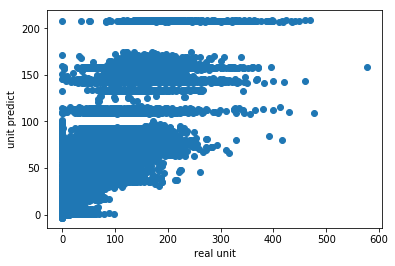

In [84]:
dfy_new = result.predict(dfX)

plt.scatter(dfy, dfy_new)
plt.xlabel(u"real unit")
plt.ylabel(u"unit predict")
plt.show()

In [80]:
#테스트 파일 합성
df_test_key= df_test.merge(df_key, on=["store_nbr"], how="inner")
df_test_key

,date,store_nbr,item_nbr,station_nbr
0,2013-04-01,2,1,14
1,2013-04-01,2,2,14
2,2013-04-01,2,3,14
3,2013-04-01,2,4,14
4,2013-04-01,2,5,14
5,2013-04-01,2,6,14
6,2013-04-01,2,7,14
7,2013-04-01,2,8,14
8,2013-04-01,2,9,14
9,2013-04-01,2,10,14


In [81]:
df_test_total = df_test_key.merge(df_weather, on=["date","station_nbr"],how="inner")

In [82]:
df_test_total

,date,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,wetbulb,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2013-04-01,2,1,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
1,2013-04-01,2,2,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
2,2013-04-01,2,3,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
3,2013-04-01,2,4,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
4,2013-04-01,2,5,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
5,2013-04-01,2,6,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
6,2013-04-01,2,7,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
7,2013-04-01,2,8,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
8,2013-04-01,2,9,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0
9,2013-04-01,2,10,14,71,42,57,1,41,48,...,0617,1851,RA,0.0,T,28.68,30.05,9.3,04,11.0


In [18]:
def getStoreList(df, item_nbr, msg=True):
    df_ = df.copy()
    df_ = df_[df_["item_nbr"] == item_nbr]
    df_ = df_[df_["units"] != 0]
    if msg:
        print("팔린 개수가 0이상인 row 개수 : " + str(len(df_)))
        print("총 팔린 개수 : " + str(df_["units"].sum()))
        print(str(item_nbr) + "번 아이템이 팔린 스토어 개수 : " + str(len(list(df_["store_nbr"].unique()))))
        print(str(item_nbr) + "번 아이템이 팔린 스토어 넘버 리스트 : " + str(list(df_["store_nbr"].unique())))
    return len(df_), str(df_["units"].sum()), list(df_["store_nbr"].unique())

In [40]:
a,b,c = getStoreList(train_preprocess,5)

팔린 개수가 0이상인 row 개수 : 16656
총 팔린 개수 : 846662
5번 아이템이 팔린 스토어 개수 : 18
5번 아이템이 팔린 스토어 넘버 리스트 : [2, 42, 3, 20, 28, 10, 44, 7, 13, 8, 9, 18, 23, 26, 15, 37, 40, 21]


In [44]:
df_item_5 = df_total[df_total["item_nbr"] ==5]

In [51]:
c

[2, 42, 3, 20, 28, 10, 44, 7, 13, 8, 9, 18, 23, 26, 15, 37, 40, 21]

In [46]:
df_item_5.head()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7432,2012-01-01,2,5,191,5.257495,2012-01-01,14,0.0,0.0,6,...,0739,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3
7447,2012-01-01,42,5,154,5.043425,2012-01-01,14,0.0,0.0,6,...,0739,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3
7450,2012-01-02,2,5,147,4.997212,2012-01-02,14,0.0,0.0,0,...,0739,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4
7465,2012-01-02,42,5,61,4.127134,2012-01-02,14,0.0,0.0,0,...,0739,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4
7468,2012-01-03,2,5,104,4.653960,2012-01-03,14,0.0,0.0,1,...,0740,1730,,0.0,0.00,28.84,30.30,12.4,18,12.7


In [59]:
# 판다스 다중 필터
df_item_5 = df_item_5[df_item_5["store_nbr"].isin(c)]

In [60]:
df_item_5

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
7432,2012-01-01,2,5,191,5.257495,2012-01-01,14,0.0,0.0,6,...,0739,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3
7447,2012-01-01,42,5,154,5.043425,2012-01-01,14,0.0,0.0,6,...,0739,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3
7450,2012-01-02,2,5,147,4.997212,2012-01-02,14,0.0,0.0,0,...,0739,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4
7465,2012-01-02,42,5,61,4.127134,2012-01-02,14,0.0,0.0,0,...,0739,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4
7468,2012-01-03,2,5,104,4.653960,2012-01-03,14,0.0,0.0,1,...,0740,1730,,0.0,0.00,28.84,30.30,12.4,18,12.7
7483,2012-01-03,42,5,72,4.290459,2012-01-03,14,0.0,0.0,1,...,0740,1730,,0.0,0.00,28.84,30.30,12.4,18,12.7
7486,2012-01-04,2,5,58,4.077537,2012-01-04,14,0.0,1.0,2,...,0740,1731,,0.0,0.00,28.89,30.29,6.1,34,7.6
7501,2012-01-04,42,5,15,2.772589,2012-01-04,14,0.0,1.0,2,...,0740,1731,,0.0,0.00,28.89,30.29,6.1,34,7.6
7504,2012-01-05,2,5,138,4.934474,2012-01-05,14,0.0,1.0,3,...,0740,1732,,0.0,0.00,28.71,30.14,9.8,21,10.3
7519,2012-01-05,42,5,112,4.727388,2012-01-05,14,0.0,1.0,3,...,0740,1732,,0.0,0.00,28.71,30.14,9.8,21,10.3


In [61]:
cf.isThereNoneData(df_item_5)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,16721,0,0.00,0,0.00,0,0.00
1,store_nbr,16721,0,0.00,0,0.00,0,0.00
2,item_nbr,16721,0,0.00,0,0.00,0,0.00
3,units,16721,0,0.00,0,0.00,0,0.00
4,log1p,16721,0,0.00,0,0.00,0,0.00
5,date2,16721,0,0.00,0,0.00,0,0.00
6,station_nbr,16721,0,0.00,0,0.00,0,0.00
7,preciptotal_flag,16721,0,0.00,0,0.00,0,0.00
8,depart_flag,16721,0,0.00,0,0.00,0,0.00
9,weekday,16721,0,0.00,0,0.00,0,0.00


In [65]:
new_columns = list(weather.columns) + ["units"]
new_columns

['station_nbr',
 'date',
 'tmax',
 'tmin',
 'tavg',
 'depart',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'sunrise',
 'sunset',
 'codesum',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed',
 'units']

In [72]:
df_item_5_reg = df_item_5[new_columns]
df_item_5_reg

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,units
7432,14,2012-01-01,50,34,42,5,25,35,23,0,...,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3,191
7447,14,2012-01-01,50,34,42,5,25,35,23,0,...,1729,,0.0,0.00,29.13,30.52,11.4,32,11.3,154
7450,14,2012-01-02,45,26,36,-1,16,29,29,0,...,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4,147
7465,14,2012-01-02,45,26,36,-1,16,29,29,0,...,1729,,0.0,0.00,29.21,30.65,6.3,35,7.4,61
7468,14,2012-01-03,60,24,42,5,23,33,23,0,...,1730,,0.0,0.00,28.84,30.30,12.4,18,12.7,104
7483,14,2012-01-03,60,24,42,5,23,33,23,0,...,1730,,0.0,0.00,28.84,30.30,12.4,18,12.7,72
7486,14,2012-01-04,58,32,45,9,27,37,20,0,...,1731,,0.0,0.00,28.89,30.29,6.1,34,7.6,58
7501,14,2012-01-04,58,32,45,9,27,37,20,0,...,1731,,0.0,0.00,28.89,30.29,6.1,34,7.6,15
7504,14,2012-01-05,67,29,48,12,28,38,17,0,...,1732,,0.0,0.00,28.71,30.14,9.8,21,10.3,138
7519,14,2012-01-05,67,29,48,12,28,38,17,0,...,1732,,0.0,0.00,28.71,30.14,9.8,21,10.3,112


In [73]:
cf.isThereNoneData(df_item_5_reg)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,16721,0,0.00,0,0.00,0,0.00
1,date,16721,0,0.00,0,0.00,0,0.00
2,tmax,16721,120,0.72,0,0.00,0,0.00
3,tmin,16721,117,0.70,0,0.00,0,0.00
4,tavg,16721,214,1.28,0,0.00,0,0.00
5,depart,16721,11500,68.78,0,0.00,0,0.00
6,dewpoint,16721,125,0.75,0,0.00,0,0.00
7,wetbulb,16721,198,1.18,0,0.00,0,0.00
8,heat,16721,214,1.28,0,0.00,0,0.00
9,cool,16721,214,1.28,0,0.00,0,0.00


In [74]:
cf.remove_columns(df_item_5_reg, ["depart","codesum","station_nbr","sunrise","sunset","date"])

제거한 컬럼명 : ['depart', 'codesum', 'station_nbr', 'sunrise', 'sunset', 'date']


,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,units
216169,82,66,74,57,63,0,9,0.0,0.00,29.04,29.72,12.6,19,16.0,23
216182,70,47,59,44,51,6,0,0.0,0.10,29.39,30.07,6.1,01,6.6,14
216195,73,41,57,42,50,8,0,0.0,0.00,29.43,30.15,2.0,18,2.7,19
216208,78,51,65,41,51,0,0,0.0,0.00,29.38,30.09,4.9,28,10.2,30
216221,55,33,44,32,41,21,0,0.0,0.00,29.65,30.36,11.1,35,11.5,15


In [105]:
df_item_5_reg.head()

,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,units
7432,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,191
7447,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,154
7450,45.0,26.0,36.0,16.0,29.0,29.0,0.0,0.0,0.0,29.21,30.65,6.3,35.0,7.4,147
7465,45.0,26.0,36.0,16.0,29.0,29.0,0.0,0.0,0.0,29.21,30.65,6.3,35.0,7.4,61
7468,60.0,24.0,42.0,23.0,33.0,23.0,0.0,0.0,0.0,28.84,30.30,12.4,18.0,12.7,104


In [77]:
df_item_5_reg = cf.remove_m_row(df_item_5_reg, df_item_5_reg.columns)

원본 데이터프레임 length : 16721
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'units']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 12978


In [106]:
df_item_5_reg.head()

,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,units
7432,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,191
7447,50.0,34.0,42.0,25.0,35.0,23.0,0.0,0.0,0.0,29.13,30.52,11.4,32.0,11.3,154
7450,45.0,26.0,36.0,16.0,29.0,29.0,0.0,0.0,0.0,29.21,30.65,6.3,35.0,7.4,147
7465,45.0,26.0,36.0,16.0,29.0,29.0,0.0,0.0,0.0,29.21,30.65,6.3,35.0,7.4,61
7468,60.0,24.0,42.0,23.0,33.0,23.0,0.0,0.0,0.0,28.84,30.30,12.4,18.0,12.7,104


In [84]:
y = ["units"]
x = list(df_item_5_reg.columns)[:-1]

In [85]:
x

['tmax',
 'tmin',
 'tavg',
 'dewpoint',
 'wetbulb',
 'heat',
 'cool',
 'snowfall',
 'preciptotal',
 'stnpressure',
 'sealevel',
 'resultspeed',
 'resultdir',
 'avgspeed']

In [91]:
dfx0 = df_item_5_reg[x]
dfy = df_item_5_reg["units"]
dfX = sm.add_constant(dfx0) 

In [100]:
dfX = sm.add_constant(dfx0) 

In [101]:
model_item_5 = sm.OLS(dfy, dfX)
result_item_5 = model_item_5.fit()
print(result_item_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     16.76
Date:                Sun, 01 Jul 2018   Prob (F-statistic):           6.30e-39
Time:                        17:05:01   Log-Likelihood:                -64506.
No. Observations:               12978   AIC:                         1.290e+05
Df Residuals:                   12964   BIC:                         1.291e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1710      0.055     -3.084      

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_item_5_reg.values, i) for i in range(df_item_5_reg.shape[1])]
vif["features"] = df_item_5_reg.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.016811,units
1,1.021485,snowfall
2,1.095178,preciptotal
3,1.098047,resultdir
4,1.776024,stnpressure
5,2.392825,sealevel
6,7.332984,resultspeed
7,8.404387,avgspeed
8,84.714326,dewpoint
9,248.006015,wetbulb


In [3]:
cf.isThereNoneData(station_11)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,1,0.10,0,0.00,0,0.0
3,tmin,1035,1,0.10,0,0.00,0,0.0
4,tavg,1035,4,0.39,0,0.00,0,0.0
5,depart,1035,35,3.38,0,0.00,0,0.0
6,dewpoint,1035,60,5.80,0,0.00,0,0.0
7,wetbulb,1035,63,6.09,0,0.00,0,0.0
8,heat,1035,4,0.39,0,0.00,0,0.0
9,cool,1035,4,0.39,0,0.00,0,0.0


# 위에 함수에의해 60%이상 m벨루를 포함한 컬럼 "depart", "snowfall", "sunrise", "sunset"은 제거한다.

In [38]:
station_11.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,11,2012-01-01,72,48,60,7,54,56,5,0,0724,1737,FG+ FG BR,0.0,0.00,30.15,30.18,4.6,23,4.8
1,11,2012-01-02,63,40,52,-1,31,44,13,0,0724,1738,,0.0,0.00,30.10,30.14,10.2,29,11.1
2,11,2012-01-03,44,25,35,-18,12,28,30,0,0724,1738,,0.0,0.00,30.26,30.33,9.3,31,9.7
3,11,2012-01-04,54,22,38,-15,15,29,27,0,0724,1739,,0.0,0.00,30.34,30.37,2.3,27,3.1
4,11,2012-01-05,68,31,50,-3,35,41,15,0,0724,1740,,0.0,0.00,M,30.21,6.6,27,M


In [39]:
cf.remove_columns(station_11, ["tavg","tmin","tmax","date","sunrise", "sunset","codesum","station_nbr"])

제거한 컬럼명 : ['tavg', 'tmin', 'tmax', 'date', 'sunrise', 'sunset', 'codesum', 'station_nbr']


,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
1030,4,60,64,0,6,0.0,0.00,30.01,30.06,1.2,15,3.8
1031,3,61,64,0,5,0.0,0.00,30.09,30.13,1.9,19,3.1
1032,5,62,65,0,7,0.0,0.00,30.02,30.05,2.3,21,3.0
1033,4,63,65,0,5,0.0,0.00,29.91,29.94,1.6,36,3.4
1034,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1


In [40]:
station_11.head()

,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,7,54,56,5,0,0.0,0.00,30.15,30.18,4.6,23,4.8
1,-1,31,44,13,0,0.0,0.00,30.10,30.14,10.2,29,11.1
2,-18,12,28,30,0,0.0,0.00,30.26,30.33,9.3,31,9.7
3,-15,15,29,27,0,0.0,0.00,30.34,30.37,2.3,27,3.1
4,-3,35,41,15,0,0.0,0.00,M,30.21,6.6,27,M


In [41]:
station_11_t = cf.remove_m_row(station_11, station_11.columns)
print("")
print("")
station_11_dropped_all = cf.remove_m_row(station_11)

원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 932


원본 데이터프레임 length : 1035
제거하고 싶은 컬럼 : ['depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 int 컬럼 : ['dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 932


In [42]:
station_11.head()

,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,7,54,56,5,0,0.0,0.00,30.15,30.18,4.6,23,4.8
1,-1,31,44,13,0,0.0,0.00,30.10,30.14,10.2,29,11.1
2,-18,12,28,30,0,0.0,0.00,30.26,30.33,9.3,31,9.7
3,-15,15,29,27,0,0.0,0.00,30.34,30.37,2.3,27,3.1
4,-3,35,41,15,0,0.0,0.00,M,30.21,6.6,27,M


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(station_11_t.values, i) for i in range(station_11_t.shape[1])]
vif["features"] = station_11_t.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.287446e+00,preciptotal
1,1.871166e+00,depart
2,4.657740e+00,resultdir
3,1.933409e+01,heat
4,4.401480e+01,resultspeed
5,5.099434e+01,cool
6,6.815043e+01,avgspeed
7,2.454242e+03,dewpoint
8,8.830692e+03,wetbulb
9,6.430862e+06,stnpressure
